In [44]:
import suggestion
import pandas as pd


In [45]:
# -----------------------------
# bert or albert
# -----------------------------
from models import MaskedBert, MaskedAlbert

# model = MaskedAlbert.from_pretrained("C:\\Users\\Administrator\\Downloads\\chinese_bert_wwm_ext_pytorch")
def get_ppl(texts):
    l =[]
    model = MaskedBert.from_pretrained(
        path="C:\\Users\\Administrator\\Downloads\\chinese_bert_wwm_ext_pytorch",
        device="cuda:0",  # 使用cpu或者cuda:0，default=cpu
        sentence_length=50,  # 长句做切句处理，段落会被切成最大不超过该变量的句子集，default=50
    )

    for s in texts:
        ppl = model.perplexity(
            x=" ".join(s),   # 每个字空格隔开或者输入一个list
            verbose=False,     # 是否显示详细的probability，default=False
            temperature=1.0,   # softmax的温度调节，default=1
            batch_size=100,    # 推理时的batch size，可根据cpu或gpu而定，default=100
        )
        l+= [ppl]
        
    return l
# model.perplexity(sentences[-7], verbose=True)

In [46]:

df = pd.read_csv('new_data.csv')

In [47]:
texts = df['Source'].to_list()

In [48]:
suggestion.define_pipeline()
bart_target =suggestion.get_target_list(texts)

2023-04-26 07:41:05,295 - modelscope - INFO - Use user-specified model revision: v1.0.1
INFO 2023-04-26 07:41:05,295 api.py:463] Use user-specified model revision: v1.0.1
2023-04-26 07:41:05,853 - modelscope - INFO - File chinese_vocab.txt already in cache, skip downloading!
INFO 2023-04-26 07:41:05,853 snapshot_download.py:125] File chinese_vocab.txt already in cache, skip downloading!
2023-04-26 07:41:05,856 - modelscope - INFO - File configuration.json already in cache, skip downloading!
INFO 2023-04-26 07:41:05,856 snapshot_download.py:125] File configuration.json already in cache, skip downloading!
2023-04-26 07:41:05,858 - modelscope - INFO - File dict.src.txt already in cache, skip downloading!
INFO 2023-04-26 07:41:05,858 snapshot_download.py:125] File dict.src.txt already in cache, skip downloading!
2023-04-26 07:41:05,860 - modelscope - INFO - File dict.tgt.txt already in cache, skip downloading!
INFO 2023-04-26 07:41:05,860 snapshot_download.py:125] File dict.tgt.txt already

In [49]:
suggestion.define_pipeline('ernie')
ernie_target = suggestion.get_target_list(texts)

[2023-04-26 07:42:19,274] [    INFO] - Already cached C:\Users\Administrator\.paddlenlp\models\ernie-1.0\vocab.txt
[2023-04-26 07:42:19,288] [    INFO] - tokenizer config file saved in C:\Users\Administrator\.paddlenlp\models\ernie-1.0\tokenizer_config.json
[2023-04-26 07:42:19,290] [    INFO] - Special tokens file saved in C:\Users\Administrator\.paddlenlp\models\ernie-1.0\special_tokens_map.json


In [50]:
suggestion.define_pipeline('macbert')
macbert_target = suggestion.get_target_list(texts)

In [51]:
#gpt3.5
with open('gpt3.5.txt', 'r', encoding='utf-8') as file:
    content = [line.strip() for line in file.readlines() if line.strip() !='']
# print(content)

gpt3_5 = content

In [52]:
with open('effidit.txt', 'r', encoding='utf-8') as file:
    content = [line.strip() for line in file.readlines() if line.strip() !='']
# print(content)

effidit = content

In [53]:
#gpt4.0
gpt4 = ['在环游世界的旅程中，我们见闻了许多新奇的事物。',
'球员们满场飞跑，熟练地控制着皮球。',
'交通发达的地方，往往成为货物的集散地。',
'年轻人的身心发展，尤其值得家长重视。',
'辛亥革命唤醒了中国人的觉悟。',
'在手术室里，护士正忙于协助医生、消毒仪器，以便进行手术。',
'经过数十小时的学习，我已经掌握了基本的驾驶技术。',
'同一件货品，在中港两地，价格相差了一大截。',
'连绵大雨，在街上走了很短的路，裤管上沾满了泥泞。',
'两架直升机在空中飞驰。',
'随着经济的发展，人们的生活水平大为改善。',
'春风一阵阵吹来，树枝摇曳，月光与树影一起晃动，发出沙沙的响声。',
'警方表示有信心扫除毒品的祸害和影响。',
'学写诗歌，要注意提炼诗的语言和题材。',
'千言万语都表达不了我们对老师的感激之情。',
'经过这次讲课，给大家带来很大的启发。',
'在通讯事业迅速发展的情况下，我们可以获得的资讯越来越多。',
'世界红十字会致力于拯救第三世界国家的贫困儿童。',
'为了达到目的，不惜使用任何手段。',
'地铁载客量高，并且比其他交通工具更准时抵达目的地。',
'每当我遇到困难，他总是想办法帮助我解决。',
'学校开办各种暑期活动，有朗诵、绘画、书法、烹饪等兴趣小组，并举行了学艺比赛。',
'我们走过了笔直且漫长的路，终于到达了目的地。',
'中文与任何西方语言都不同。',
'他突然大声叫了起来。',
'漫山遍野，到处都是逃难的人们。',
'成熟的苹果落地，是因为地球引力的作用。',
'如果我们不能认真读好这本书，就谈不上读其他书了。',
'这个问题在群众中引起了广泛的议论。',
'巴甫洛夫整天忙于进行条件反射的实验，他总是把动物用绳子绑在实验室的架子上。',
'当时，许峰正住院治疗，听说有险情，他带病走出医院，不顾医生的劝阻，投入到抗洪救灾工作中去。',
'这种方法既卫生又方便，深受群众喜爱。',
'我们要下决心，花大力气，争取在本世纪把我国的教育事业达到先进水平。',
'事实上，胡适先生的英文文章也写了不少，连同这一百多封信，都应该收集成书，供中外学者阅读。',
'当然，要搞好跨学科渗透和综合，并非易事，需要付出更多努力。',
'这届全运会的会徽和吉祥物设计的参赛者以青年师生为主。',
'我住在哈尔滨，黑龙江省，这里非常寒冷！',
'他做梦时觉得自己是一个宇航员。',
'正要回家时，突然下起了雨。',
'我决定学汉语是因为我住在美国中部（所以说汉语的人不多）。',
'这个星期她没有教我。',
'考虑到这些信息，我不知道有多少年轻人能买得起房子。',
'听说那部中国的《水浒传》影响很大。',
'那天晚上大约20点左右，我到了桃园机场。',
'有时候，这使我们觉得非常有趣。',
'而且，公司的院子里有一棵樱花树。',
'听说在中国的儿子生活的情况令人震惊。',
'睡了三个小时后终于醒了，但仍感到困乏和疲劳。',
'我听得懂老师讲的话，看得懂内容，但是口语很差。',
'那时，我决定上口语课，希望有一天能用口语与朋友交流。',
'当我使用书（阅读、学习等）时，会小心保持它的良好状态；如果将来我不再需要它了，我会把书给需要的人，让他们继续利用这本书。',
'虽然景况非常糟糕，但从四月开始，燃料附加运费降低了。',
'李白就像酒杯中的八仙之一。',
'老家给我的安全感逐渐消失了。',
'现在她在日本、中国和台湾经常举办音乐表演。',
'好像他们在测试我们的集中力。',
'我看见那个女学生准备了关于旅行的几个句子，这些句子没有太大的错误。',
'而且，虽然我的日本朋友说错了声调，我仍然能听懂，至少能预测他想说什么，但对于说错声调的中国人，我真的不知道他们在说什么。很奇怪！',
'尽管她正在经历严峻的考验，有时会遇到难以解决的问题，但她总是用乐观的心态去寻找新的解决办法，这让人非常敬佩。',
'上周五，我们在上海歌城举办了公司的圣诞&忘年会。',
'当我开始学中文时，我曾经认为中国歌曲没什么意思。',
'上班的时候，我看到了一只燕子。',
'比如说，我可以介绍一下如何使用一些英语俚语。']

In [54]:
df['BART'] = bart_target
df['ernie'] = ernie_target
df['macbert'] = macbert_target

df['gpt3.5'] = gpt3_5
df['gpt4'] = gpt4
df['effidit'] = effidit

In [67]:
[ (i,sum(get_ppl(df[i]))/len(df[i])) for i in  df.columns[3:]]

[('Source', 6.410553669800723),
 ('Truth', 2.897373689386091),
 ('BART', 3.6019413267616938),
 ('ernie', 6.51780371249358),
 ('macbert', 6.513893556887732),
 ('gpt3.5', 3.1709822136026724),
 ('gpt4', 2.132125081933686),
 ('effidit', 4.528597633372484)]

In [55]:
sum(get_ppl(df['Source']))/len(df['Source'])

6.410553669800723

In [56]:
sum(get_ppl(df['Truth']))/len(df['Source'])

2.897373689386091

In [57]:
sum(get_ppl(bart_target))/len(df['Source'])

3.6019413267616938

In [58]:
sum(get_ppl(ernie_target))/len(df['Source'])

6.51780371249358

In [59]:
sum(get_ppl(gpt3_5))/len(df['Source'])

3.1709822136026724

In [60]:
sum(get_ppl(gpt4))/len(df['Source'])

2.132125081933686

In [25]:
def update_columns(df, column1, column2):
    df[column2] = df.apply(lambda row: 'unchanged' if row[column1] == row[column2] else row[column2], axis=1)
    return df

update_columns(df, 'Source','BART')
update_columns(df, 'Source','ernie')
update_columns(df, 'Source','macbert')
update_columns(df, 'Source','gpt3.5')
update_columns(df, 'Source','gpt4')
update_columns(df,'Source','effidit')

,Unnamed: 0,class,Source,Truth,BART,ernie,macbert,gpt3.5,gpt4,effidit
0,0,名词误用,在环游世界的旅程中，我们见闻了许多新奇的事物。,在环游世界的旅程中，我们见识了许多新奇的事物。,unchanged,unchanged,unchanged,在环游世界的旅程中，我们见识了许多新奇的事物。,unchanged,unchanged
1,1,名词误用,球员满场飞跑，技巧地控制着皮球。,球员满场飞跑，灵活地控制着皮球。,unchanged,unchanged,unchanged,球员满场奔跑，技巧地控制着皮球。,球员们满场飞跑，熟练地控制着皮球。,unchanged
2,2,动词误用,交通比较发展的地方，会成为货物的集散地。,交通比较发达的地方，会成为货物的集散地。,交通比较发达的地方，会成为货物的集散地。,unchanged,unchanged,交通比较发达的地方，会成为货物的集散地。,交通发达的地方，往往成为货物的集散地。,交通比较发达的地方，会成为货物的集散地。
3,3,动词误用,年青人的身心发展，特别值得家长的重视。,年青人的身心发展，特别值得家长重视。,unchanged,年轻人的身心发展，特别值得家长的重视。,unchanged,年轻人的身心发展，特别值得家长的重视。,年轻人的身心发展，尤其值得家长重视。,年轻人的身心发展，特别值得家长的重视。
4,4,动词误用,辛亥革命，觉醒了中国人的心声。,辛亥革命，唤醒了中国人的心。,辛亥革命，唤醒了中国人的心声。,unchanged,unchanged,辛亥革命，唤醒了中国人的心声。,辛亥革命唤醒了中国人的觉悟。,辛亥革命，唤醒了中国人的心声。
...,...,...,...,...,...,...,...,...,...,...
58,58,中文学习者,虽然她正在体会严峻的考验，有时碰到很难解决的事情，可是用乐观的想法来闯出一条新路子，真令人佩服呢。,虽然她正在经历严峻的考验，有时也会碰到很难解决的事情，可是她用乐观的心态来闯出一条新路子，真...,虽然她正在经历严峻的考验，有时碰到很难解决的事情，可是用乐观的想法来闯出一条新路子，真令人佩服呢。,unchanged,unchanged,虽然她正在经历艰难的考验，有时会遇到很难解决的问题，但用乐观的态度开创新路，真的很令人钦佩。,尽管她正在经历严峻的考验，有时会遇到难以解决的问题，但她总是用乐观的心态去寻找新的解决办法，...,unchanged
59,59,中文学习者,上周五在上海歌城有了公司的圣诞&amp;忘年会。,上周五在上海歌城有公司的圣诞&忘年会。,上周五在上海歌城有公司的圣诞&amp;忘年会。,上周五在上海歌城有了公司的圣诞&amp;旺年会。,unchanged,上周五，在上海歌城举行了我们公司的圣诞和年末聚会。,上周五，我们在上海歌城举办了公司的圣诞&忘年会。,上周五在上海歌城有了公司的圣诞&amp;晚年会。
60,60,中文学习者,我开始中文课的时候，我曾经认为中国歌没什么意思的东西。,我开始上中文课的时候，我曾经认为中文歌是没什么意思的东西。,我开始上中文课的时候，我曾经认为中国歌没什么意思。,我开始中文课的时候，我曾经认为中国哥没什么意思的东西。,unchanged,我刚开始上中文课的时候，认为中国的音乐没有什么意思。,当我开始学中文时，我曾经认为中国歌曲没什么意思。,我开始上中文课的时候，我曾经认为中国没什么有意思的东西。
61,61,中文学习者,上班的时候，我看了一个燕子。,上班的时候，我看见了一只燕子。,上班的时候，我看到了一只燕子。,上班的时候，我看了一个样子。,上班的时候，我看了一个样子。,上班的时候，我看到了一只燕子。,上班的时候，我看到了一只燕子。,上班的时候，我看见了一个燕子。


In [26]:
df.to_csv('new_data.csv')

In [32]:
sentences = [
    "中国人的性情是总喜欢调和折中的，譬如你说，这屋子太暗，须在这里开一个窗，大家一定不允许的。但如果你主张拆掉屋顶他们就来调和，愿意开窗了。",
    "惟将终夜长开眼，报答平生未展眉",
    "我原以为，你身为汉朝老臣，来到阵前，面对两军将士，必有高论。没想到，竟说出如此粗鄙之语！",
    "人生当中成功只是一时的，失败却是主旋律，但是如何面对失败，却把人分成不同的样子，有的人会被失败击垮，有的人能够不断的爬起来继续向前，我想真正的成熟，应该不是追求完美，而是直面自己的缺憾，这才是生活的本质，罗曼罗兰说过，这个世界上只有一种真正的英雄主义，那就是认清生活的真相，并且仍然热爱它。难道向上攀爬的那条路不是比站在顶峰更让人热血澎湃吗？",
    "我在树上游泳。",
    "我在游泳池游泳。",
    "我游泳在游泳池。",
    "尤是为了,更佳大的,念,念,李是彼,更伟大的多,你只会用这种方法解决问题吗!",
]




# -----------------------------
# bert or albert
# -----------------------------
from models import MaskedBert, MaskedAlbert

# model = MaskedAlbert.from_pretrained("C:\\Users\\Administrator\\Downloads\\chinese_bert_wwm_ext_pytorch")
def get_ppl(texts):
    l =[]
    model = MaskedBert.from_pretrained(
        path="C:\\Users\\Administrator\\Downloads\\chinese_bert_wwm_ext_pytorch",
        device="cuda:0",  # 使用cpu或者cuda:0，default=cpu
        sentence_length=50,  # 长句做切句处理，段落会被切成最大不超过该变量的句子集，default=50
    )

    for s in texts:
        ppl = model.perplexity(
            x=" ".join(s),   # 每个字空格隔开或者输入一个list
            verbose=False,     # 是否显示详细的probability，default=False
            temperature=1.0,   # softmax的温度调节，default=1
            batch_size=100,    # 推理时的batch size，可根据cpu或gpu而定，default=100
        )
        l+= [ppl]
        
    return l
# model.perplexity(sentences[-7], verbose=True)

In [33]:
get_ppl(sentences)

[4.2047801178637565,
 71.9166777880901,
 2.5904654267855127,
 1.9912401385364666,
 10.554332332545782,
 4.38019828931045,
 6.565384901923095,
 22.523507449668116]

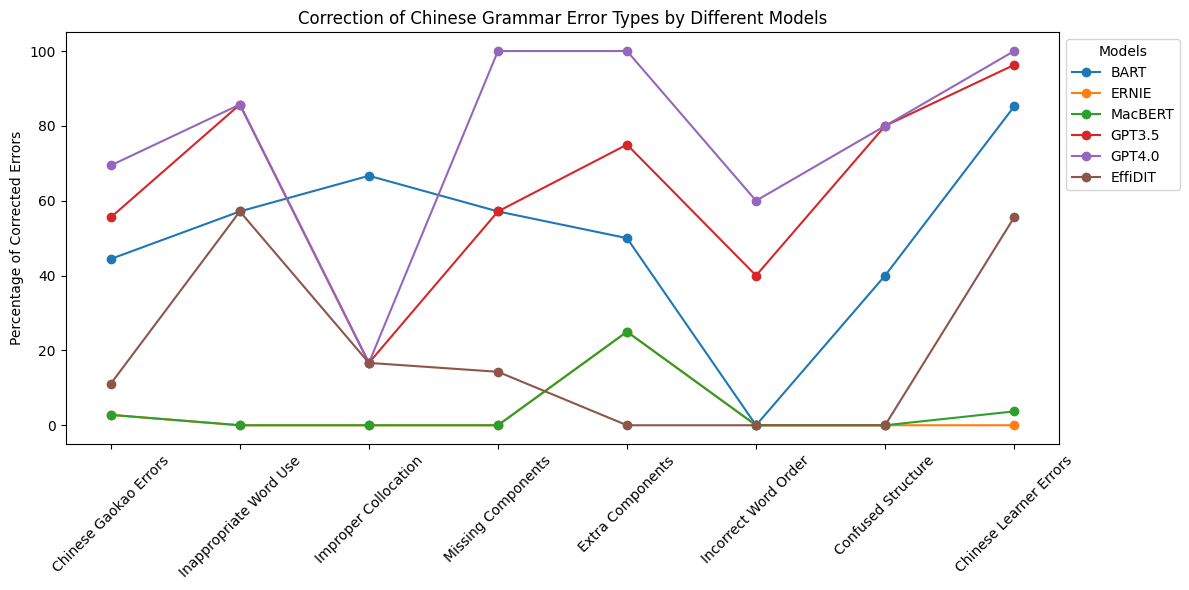

In [28]:
import matplotlib.pyplot as plt
import numpy as np
# Data
error_types = [
    "Chinese national college entrance exams Errors",
    "Inappropriate Word Use",
    "Improper Collocation",
    "Missing Components",
    "Extra Components",
    "Incorrect Word Order",
    "Confused Structure",
    "Chinese Learner Errors",
]
models = ["BART", "ERNIE", "MacBERT", "GPT3.5", "GPT4.0", "EffiDIT"]
data = [
    [16, 1, 1, 20, 25, 4],
    [4, 0, 0, 6, 6, 4],
    [4, 0, 0, 1, 1, 1],
    [4, 0, 0, 4, 7, 1],
    [2, 1, 1, 3, 4, 0],
    [0, 0, 0, 2, 3, 0],
    [2, 0, 0, 4, 4, 0],
    [23, 0, 1, 26, 27, 15],
]

total_errors = np.array([36, 7, 6, 7, 4, 5, 5, 27])
percent_data = (np.array(data).T / total_errors).T * 100

x = np.arange(len(error_types))

fig, ax = plt.subplots(figsize=(12, 6))

for i, (model, values) in enumerate(zip(models, percent_data.T)):
    ax.plot(x, values, marker="o", label=model)

ax.set_ylabel("Percentage of Corrected Errors")
ax.set_title("Correction Percentages of Chinese Grammar Error by Different Models")
ax.set_xticks(x)
ax.set_xticklabels(error_types)
ax.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Models")

plt.xticks(rotation=45)
fig.tight_layout()
plt.show()


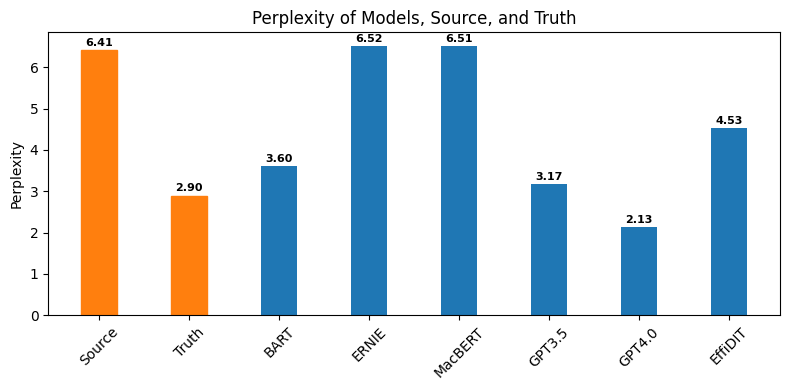

In [70]:
import matplotlib.pyplot as plt

# Data
data = [
    ("Source", 6.410553669800723),
    ("Truth", 2.897373689386091),
    ("BART", 3.6019413267616938),
    ("ERNIE", 6.51780371249358),
    ("MacBERT", 6.513893556887732),
    ("GPT3.5", 3.1709822136026724),
    ("GPT4.0", 2.132125081933686),
    ("EffiDIT", 4.528597633372484),
]

labels, values = zip(*data)
x = range(len(labels))

fig, ax = plt.subplots(figsize=(8, 4))
bar_plot = ax.bar(x, values, align="center", width=0.4)


bar_plot[0].set_color("tab:orange")
bar_plot[1].set_color("tab:orange")

for idx, value in enumerate(values):
    ax.text(
        idx,
        value + 0.05,
        "{:.2f}".format(value),
        ha="center",
        va="bottom",
        fontweight="bold",
        fontsize=8,
    )

ax.set_ylabel("Perplexity")
ax.set_title("Perplexity of Models, Source, and Truth")
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(rotation=45)
fig.tight_layout()
plt.show()


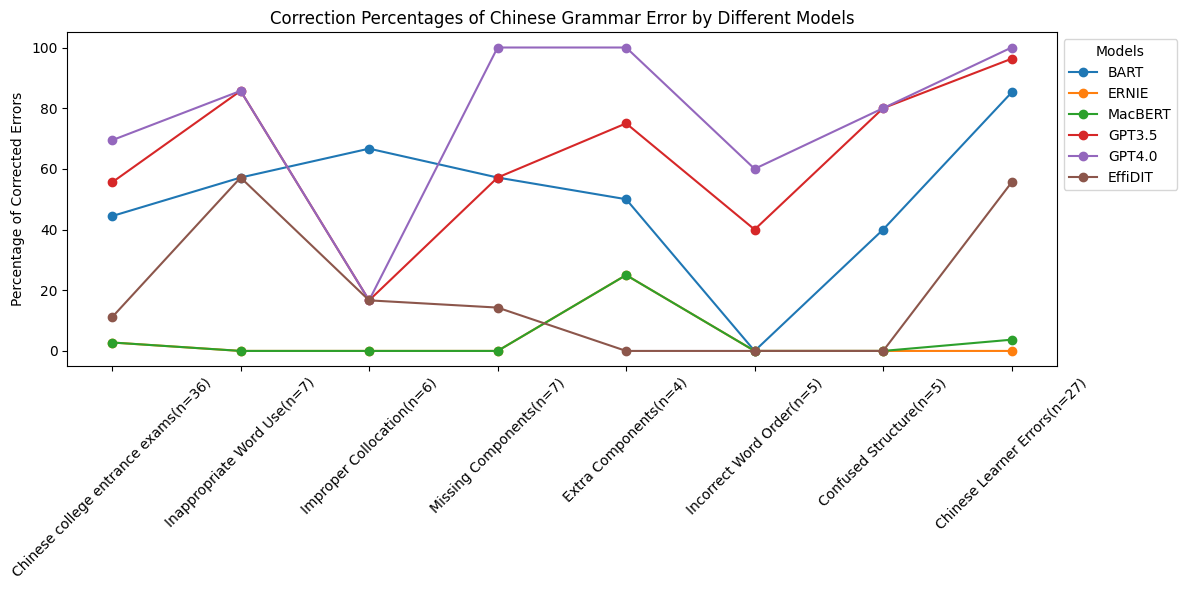

In [82]:
import matplotlib.pyplot as plt
import numpy as np
# Data
error_types = [
    "Chinese college entrance exams(n=36)",
    "Inappropriate Word Use(n=7)",
    "Improper Collocation(n=6)",
    "Missing Components(n=7)",
    "Extra Components(n=4)",
    "Incorrect Word Order(n=5)",
    "Confused Structure(n=5)",
    "Chinese Learner Errors(n=27)",
]
models = ["BART", "ERNIE", "MacBERT", "GPT3.5", "GPT4.0", "EffiDIT"]
data = [
    [16, 1, 1, 20, 25, 4],
    [4, 0, 0, 6, 6, 4],
    [4, 0, 0, 1, 1, 1],
    [4, 0, 0, 4, 7, 1],
    [2, 1, 1, 3, 4, 0],
    [0, 0, 0, 2, 3, 0],
    [2, 0, 0, 4, 4, 0],
    [23, 0, 1, 26, 27, 15],
]

total_errors = np.array([36, 7, 6, 7, 4, 5, 5, 27])
percent_data = (np.array(data).T / total_errors).T * 100

x = np.arange(len(error_types))

fig, ax = plt.subplots(figsize=(12, 6))

for i, (model, values) in enumerate(zip(models, percent_data.T)):
    ax.plot(x, values, marker="o", label=model)

ax.set_ylabel("Percentage of Corrected Errors")
ax.set_title("Correction Percentages of Chinese Grammar Error by Different Models")
ax.set_xticks(x)
ax.set_xticklabels(error_types)
ax.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Models")

plt.xticks(rotation=45)
fig.tight_layout()
plt.show()

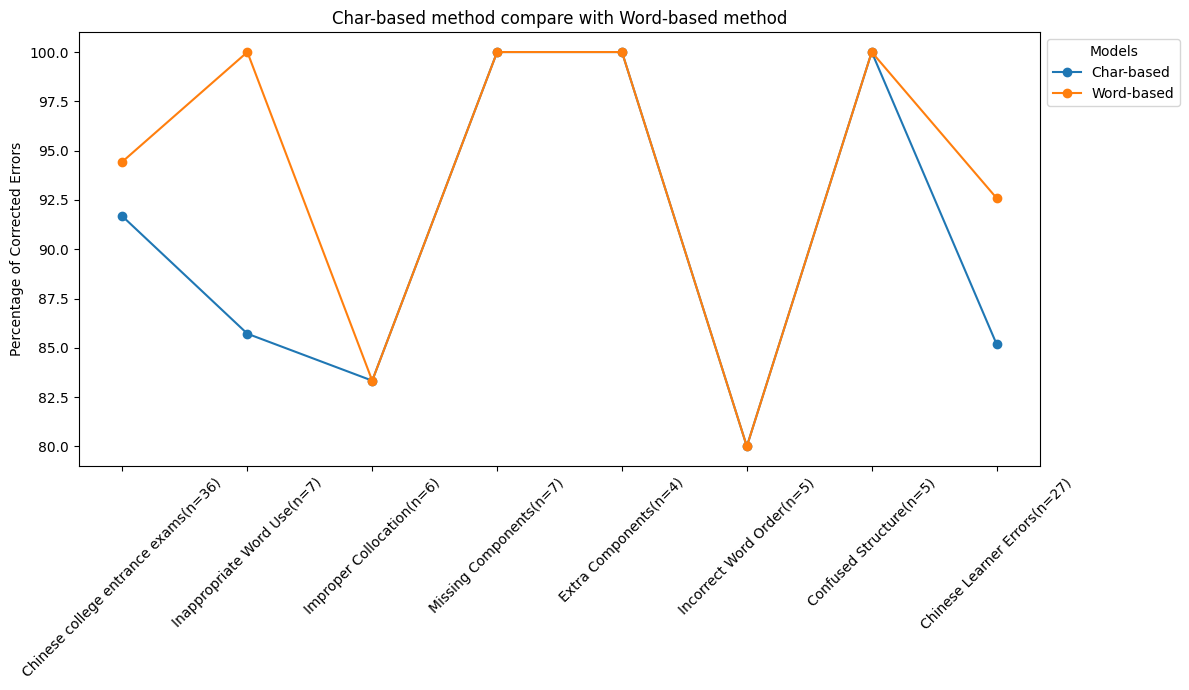

In [93]:
import matplotlib.pyplot as plt
import numpy as np
# Data
error_types = [
    "Chinese college entrance exams(n=36)",
    "Inappropriate Word Use(n=7)",
    "Improper Collocation(n=6)",
    "Missing Components(n=7)",
    "Extra Components(n=4)",
    "Incorrect Word Order(n=5)",
    "Confused Structure(n=5)",
    "Chinese Learner Errors(n=27)",
]
models = ["Char-based", "Word-based"]
data = [
    [33, 34, 1, 20, 25, 4],
    [6, 7, 0, 6, 6, 4],
    [5, 5, 0, 1, 1, 1],
    [7, 7, 0, 4, 7, 1],
    [4, 4, 1, 3, 4, 0],
    [4, 4, 0, 2, 3, 0],
    [5, 5, 0, 4, 4, 0],
    [23, 25, 1, 26, 27, 15],
]

total_errors = np.array([36, 7, 6, 7, 4, 5, 5, 27])
percent_data = (np.array(data).T / total_errors).T * 100

x = np.arange(len(error_types))

fig, ax = plt.subplots(figsize=(12, 7))

for i, (model, values) in enumerate(zip(models, percent_data.T)):
    ax.plot(x, values, marker="o", label=model)

ax.set_ylabel("Percentage of Corrected Errors")
ax.set_title("Char-based method compare with Word-based method")
ax.set_xticks(x)
ax.set_xticklabels(error_types)
ax.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Models")

plt.xticks(rotation=45)
fig.tight_layout()
plt.show()